<a href="https://colab.research.google.com/github/samp3209/courseraprojects/blob/main/intrototensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1


Hello World of Neural Networks

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.14.0


In [ ]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0])
ys = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0])

In [ ]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 414ms/step - loss: 2.5621
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 2.1667
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 1.8525
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 1.6022
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 1.4023
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 1.2422
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 1.1133
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 1.0091
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9245
Epoch 10/500
1/1 [==============================] - 0s 15ms/step - loss: 0.8551
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 0.7980
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 0.7504
Epoch 13/500
1/1 [==============================] 

In [ ]:
model.predict([10.0])

1/1 [==============================] - 0s 289ms/step


array([[18.985445]], dtype=float32)

# Week 2


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.14.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

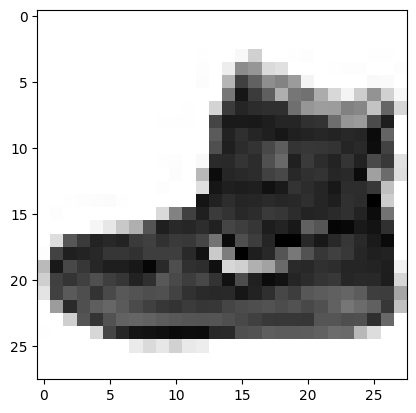

In [5]:
import numpy as np
import matplotlib.pyplot as plt

index = 0

np.set_printoptions(linewidth=320)

print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

plt.imshow(train_images[index], cmap='Greys')


In [6]:
#images work good with 255 by 255 but networks like normalized data
train_images = train_images/255.0
test_images = test_images/255.0

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a sequence of layers in the neural network

Flatten: Flatten takes a square 128 by 128 and reduces to a 1-dimensional array

Dense: Adds a layer of neurons
Each layer of neurons need an activation function to tell them what to do. But just use these for now:

Relu: if x>0: return x else return 0

Softmax takes a list of values and scales these so the sum of all the elements will be equal to 1. When applied to model outputs this can be thought of as the probability for that class.


In [8]:
# This is an example of softmax in action
#Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5034 - accuracy: 0.8235
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3795 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3427 - accuracy: 0.8747
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3187 - accuracy: 0.8834
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2988 - accuracy: 0.8912


In [11]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3499 - accuracy: 0.8735


[0.3499167263507843, 0.8734999895095825]